On commence par importer les librairies qui vont être utiles tout de suite

In [2]:
import pandas as pd
import matplotlib as plt

Suite à cela on va importer notre dataframe étudié sur ce notebook : les caractéristiques des accidents.
On utilise les fonctions .info() et .describe() pour pouvoir avoir une vue globale du dataframe étudié

In [3]:
df_carac=pd.read_csv("carcteristiques-2022.csv",sep=';')
df_carac

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000"
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000"
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55297,202200055298,1,1,2022,03:50,3,2B,2B293,1,1,1,6,D71,"42,3101650000","9,4785830000"
55298,202200055299,1,1,2022,07:20,3,84,84074,1,1,1,6,D973,"43,7531640000","5,2244760000"
55299,202200055300,1,1,2022,04:27,3,74,74001,1,1,9,6,D22,"46,2825320000","6,7328060000"
55300,202200055301,1,1,2022,08:40,1,81,81099,1,3,1,3,Chemin Toulze,"43,9272650000","1,9156370000"


In [4]:
df_carac.describe()

,Accident_Id,jour,mois,an,lum,agg,int,atm,col
count,5.530200e+04,55302.000000,55302.000000,55302.0,55302.000000,55302.000000,55302.000000,55302.000000,55302.000000
mean,2.022000e+11,15.607971,6.588514,2022.0,1.927308,1.633539,2.063705,1.587212,4.007522
std,1.596446e+04,8.719319,3.332152,0.0,1.490073,0.481842,1.983497,1.673828,1.980689
min,2.022000e+11,1.000000,1.000000,2022.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,2.022000e+11,8.000000,4.000000,2022.0,1.000000,1.000000,1.000000,1.000000,3.000000
50%,2.022000e+11,15.000000,7.000000,2022.0,1.000000,2.000000,1.000000,1.000000,3.000000
75%,2.022000e+11,23.000000,9.000000,2022.0,3.000000,2.000000,2.000000,1.000000,6.000000
max,2.022001e+11,31.000000,12.000000,2022.0,5.000000,2.000000,9.000000,9.000000,7.000000


In [20]:
df_carac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Accident_Id  55302 non-null  int64 
 1   jour         55302 non-null  int64 
 2   mois         55302 non-null  int64 
 3   an           55302 non-null  int64 
 4   hrmn         55302 non-null  object
 5   lum          55302 non-null  int64 
 6   dep          55302 non-null  object
 7   com          55302 non-null  object
 8   agg          55302 non-null  int64 
 9   int          55302 non-null  int64 
 10  atm          55302 non-null  int64 
 11  col          55302 non-null  int64 
 12  adr          54069 non-null  object
 13  lat          55302 non-null  object
 14  long         55302 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ MB


Désormais on peut constater que certains colonnes ne sont pas d'une grande utilité pour notre travail : typiquement les communes, les dates et horaires (car nous avons déjà lum pour les conditions lumineuses), les intersections, les collisions et les adresses (aucune utilité, trop de valeurs possibles, de plus o a agg qui nous donne en agglomération et hors agglomération, ce qui est un critère suffisant)

Conclusion : on va donc supprimer ces colonnes 

In [36]:
df_carac.drop(columns=['jour','mois','an','hrmn', 'com', 'int', 'col', 'adr','lat','long'], inplace=True)

On va désormais faire plusieurs études sur l'impact des conditions lumineuses, des conditions atmosphériques et de la présence en agglomération sur les accidents

In [24]:
df_carac_lum=df_carac.groupby(by='lum')
df_carac_lum.size()

lum
-1        2
 1    36845
 2     3589
 3     5628
 4      511
 5     8727
dtype: int64

<Axes: xlabel='lum'>

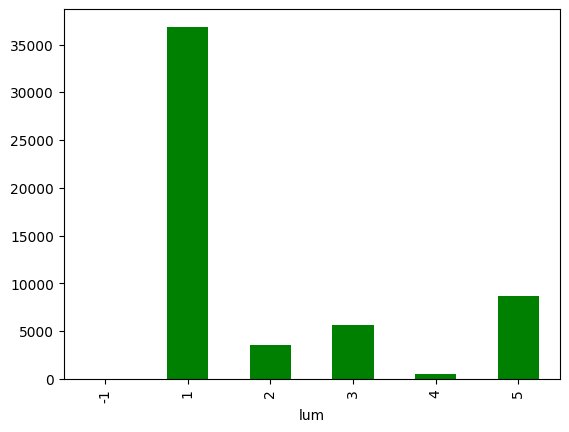

In [35]:
df_carac_lum.size().plot.bar(x='lum', color='green')

Pour les valeurs de lum, on pourra se référer au pdf d'explication fourni par data.gouv.fr, on a donc les équivalences suivantes : 

1 – Plein jour

2 – Crépuscule ou aube

3 – Nuit sans éclairage public

4 – Nuit avec éclairage public non allumé

5 – Nuit avec éclairage public allumé

On peut peut expliquer la prédominance des accidents 1 par rapport au fait que l'on prend majoritairement la voiture le jour, que ce soit pour aller au travail, pour voyager, faire des courses et il est donc logique que ce soit le jour que la majorité des accidents se produisent.

En revanche pour la nuit on assiste à un phénomène très particulier : en effet on remarque que le nombre d'accidents de type 5 est supérieur à la somme des types 3 et 4. Donc avec un éclairage public **allumé** il y a plus d'accidents qu'avec l'absence de lumière (= pas d'éclairage ou éclairage éteint)

Une explication pourrait être qu'avec la lumière allumée, le conducteur est moins vigilent car plus en confiance sur la route (effet psychologique : "il y a de la lumière, si il y a un risque je le verrais, etc")



---------------------------------------------------------------------------------------------------------



On va désormais étudier les conditions atmosphériques et son implications dans les accidents

<Axes: xlabel='atm'>

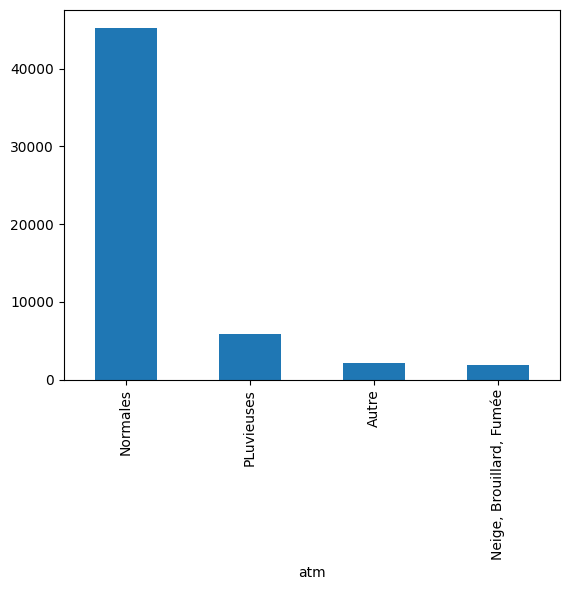

In [41]:
df_carac_atm=pd.cut(df_carac['atm'], bins=[0.5,1.5,3.5,7.5,9.5], labels=['Normales', 'PLuvieuses', 'Neige, Brouillard, Fumée', 'Autre'])
df_carac_atm.value_counts().plot.bar()

Clairement, il y a plus d'accidents lors de conditions normales, en revanche on peut travailler avec une autre dataframe pour savoir si les accidents dans les conditions *pluvieuses* et *neige, brouillard ou fumée* sont des accidents plus grave que dans les accidents dans les conditions normales. 

On va donc utiliser la table usager pour pouvoir concaténer les deux tables et étudier la gravité des accidents dans chaque conditions atmosphériques.

In [46]:
df_usager=pd.read_csv('usagers-2022.csv', sep=';', usecols=['Num_Acc', 'id_vehicule', 'grav','sexe'])
df_usager

,Num_Acc,id_vehicule,grav,sexe
0,202200000001,813 952,3,1
1,202200000001,813 953,1,1
2,202200000002,813 950,4,1
3,202200000002,813 951,1,1
4,202200000003,813 948,1,1
...,...,...,...,...
126657,202200055301,715 631,1,2
126658,202200055301,715 631,3,2
126659,202200055301,715 632,4,2
126660,202200055302,715 629,3,1


Nous avons aussi la donnée des départements, ce que nous pouvons essayer de faire c'est voir le nombre d'accidents par départements, et avec un nouveau fichier Departements.csv qui nous donne la population par département, constater si le nombre d'accidents est proportionnel au nombre d'habitants et surtout voir si certains départements sont plus propices aux accidents que d'autres.7

Source du Departements.csv : statistiques de l'INSEE

In [6]:
df_dep=pd.read_csv('Departements.csv', sep=';', usecols=['CODDEP', 'DEP', 'PTOT'], index_col='CODDEP')
df_dep
#pop_totale=df_dep['PTOT'].sum()
#pop_totale

,DEP,PTOT
CODDEP,,
01,Ain,659180
02,Aisne,546527
03,Allier,347035
04,Alpes-de-Haute-Provence,168381
05,Hautes-Alpes,145883
...,...,...
95,Val-d'Oise,1239262
971,Guadeloupe,396153
972,Martinique,377711


On va désormais calculer le taux d'habitant dans chaque département et le taux d'accidents, pour voir si on a
des départements plus "dangereux" que d'autres. 

On commence par merge les deux tables dans une table df_tot, puis on va créer les colonnes qui vont nous intéresser

In [62]:
df_tot=pd.merge(df_dep, df_carac, left_index=True, right_on='dep')
df_tot

,DEP,PTOT,% POP,%accidents,Accident_Id,lum,dep,agg,atm
210,Ain,659180,0.009728,0.008859,202200000211,3,01,2,1
225,Ain,659180,0.009728,0.008859,202200000226,1,01,2,1
226,Ain,659180,0.009728,0.008859,202200000227,1,01,1,1
501,Ain,659180,0.009728,0.008859,202200000502,2,01,2,1
517,Ain,659180,0.009728,0.008859,202200000518,1,01,2,2
...,...,...,...,...,...,...,...,...,...
54954,La Réunion,863063,0.012737,0.013691,202200054955,3,974,1,1
55134,La Réunion,863063,0.012737,0.013691,202200055135,1,974,1,1
55145,La Réunion,863063,0.012737,0.013691,202200055146,1,974,2,1
55154,La Réunion,863063,0.012737,0.013691,202200055155,1,974,2,1


On calcule le nombre d'accidents dont le département est répertorié dans la table

In [66]:
nb_accidents=df_tot.shape[0]
nb_accidents

54636

On peut déjà calculer le % d'accidents qui se produisent dans chaque département

<Axes: xlabel='dep'>

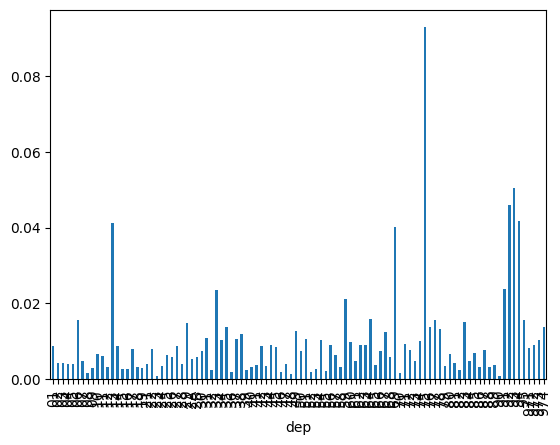

In [67]:
(df_tot.groupby(by='dep').size()/nb_accidents).plot.bar()

On calcule désormais notre population totale puis le pourcentage de population dans chaque département avec une nouvelle colonne % POP

In [68]:
pop_totale=df_dep['PTOT'].sum()

df_dep['% POP']=df_dep['PTOT']/pop_totale
df_dep

,DEP,PTOT,% POP,%accidents
CODDEP,,,,
01,Ain,659180,0.009728,0.008859
02,Aisne,546527,0.008065,0.004228
03,Allier,347035,0.005121,0.004319
04,Alpes-de-Haute-Provence,168381,0.002485,0.004100
05,Hautes-Alpes,145883,0.002153,0.004008
...,...,...,...,...
95,Val-d'Oise,1239262,0.018289,0.015649
971,Guadeloupe,396153,0.005846,0.008236
972,Martinique,377711,0.005574,0.009151


On crée une nouvelle colonne dans la df %accidents qui nous donne donc le % d'accidents dans chaque département, puis on affiche ensuite uniquement les département donc le % d'accidents est supérieur au % de la population, ie les départements considérés comme les plus dangereux. Pour cela on utilise un masque dans .loc()

<Axes: xlabel='CODDEP'>

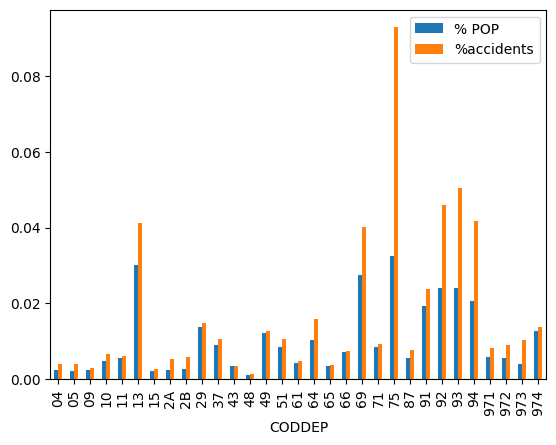

In [53]:
df_dep['%accidents']=(df_tot.groupby(by='dep').size()/nb_accidents)
df_dep[['% POP', '%accidents']].loc[df_dep['%accidents']>df_dep['% POP']].plot.bar()

Avec l'hypothèse première que chaque département est "autant" dangereux, on pourrait supposer que le % d'accidents par département serait très proche du % de la population par département. Or on voit ici sur ce graphe que ce n'est pas le cas. On voit ici que certains départements se démarquent par une forte différence entre leur %pop et leur %habitants. On y observe : la région parisienne avec 75,92,93,94, la région lyonnaise avec le 69 ou encore la région marseillaise avec le 13. 

On peut donc en déduire que la répartition des accidents n'est pas uniforme sur le territoire mais cristalisée dans les grands pôles urbains français, où la circulation peut avoir tendance à être bien plus compliquée que dans des territoires moins urbains.